In [1]:
# Carrega as bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # importa o Decision Tree Classifier
from sklearn.model_selection import train_test_split # importa o método train_test_split 
from sklearn import metrics #importa as métricas de avaliação de modelos do scikit-learn

In [16]:
# Define as colunas
col_names = ['aspecto','temperatura','umidade','vento','label']
# Carrega o dataset
pima = pd.read_csv("jogar_real.csv", header=None, names=col_names)
#label 0=não 1=sim

# Define as colunas
#col_names = ['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction', 'age', 'label']
# Carrega o dataset
#pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
#label 0=não 1=sim


In [17]:
pima.head()

,aspecto,temperatura,umidade,vento,label
0,1,30.0,85.0,1,0
1,1,33.0,80.0,2,0
2,2,32.0,90.0,1,1
3,3,23.0,87.0,1,1
4,3,15.0,60.0,1,1


In [18]:
#Separa o conjunto de dados em atributos previsores e atributo alvo/meta
feature_cols = ['aspecto','temperatura','umidade','vento']
#feature_cols = ['pregnancies', 'insulin', 'bmi', 'age','glucose','bloodpressure','diabetespedigreefunction']
X = pima[feature_cols] # Características (atributos previsores)
y = pima.label # Atributo/variável alvo
print(X)
print(y)

    aspecto  temperatura  umidade  vento
0         1         30.0     85.0      1
1         1         33.0     80.0      2
2         2         32.0     90.0      1
3         3         23.0     87.0      1
4         3         15.0     60.0      1
5         3         17.0     90.0      2
6         2         14.0     84.0      2
7         1         21.0     82.0      1
8         1         18.0     65.0      1
9         3         20.0     63.0      1
10        1         24.0     67.0      2
11        2         19.0     83.0      2
12        2         29.0     69.0      1
13        3         20.0     91.0      2
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: label, dtype: int64


In [20]:
# Separa o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) # 60% treinamento e 40% teste
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    aspecto  temperatura  umidade  vento
1         1         33.0     80.0      2
12        2         29.0     69.0      1
0         1         30.0     85.0      1
13        3         20.0     91.0      2
9         3         20.0     63.0      1
8         1         18.0     65.0      1
11        2         19.0     83.0      2
5         3         17.0     90.0      2
    aspecto  temperatura  umidade  vento
3         3         23.0     87.0      1
7         1         21.0     82.0      1
6         2         14.0     84.0      2
2         2         32.0     90.0      1
10        1         24.0     67.0      2
4         3         15.0     60.0      1
1     0
12    1
0     0
13    0
9     1
8     1
11    1
5     0
Name: label, dtype: int64
3     1
7     0
6     1
2     1
10    1
4     1
Name: label, dtype: int64


In [21]:
# Cria o objeto classificador para a árvore de decisão
clf = DecisionTreeClassifier()

# Treina o objeto classificador
clf = clf.fit(X_train,y_train)

# Realiza a predição a partir do conjunto de teste
y_pred = clf.predict(X_test)

In [8]:
# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

# Predição para casos do conjunto de diabetes
print(clf.predict([[1, 33.0, 80.0, 2]]))  #esperado o valor 0
print(clf.predict([[3, 5.0, 60.0, 1]]))   #esperado o valor 1

Accuracy: 0.7207792207792207
Precision: 0.6055045871559633
Recall: 0.6055045871559633
F1 Measure: 0.6055045871559633


In [9]:
# Utiliza o pickle para salvar o modelo treinado para uso posterior em alguma aplicação
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

y_pred = loaded_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Measure:",metrics.f1_score(y_test, y_pred))

# Predição para casos do conjunto de diabetes
print(loaded_model.predict([[6, 0, 33.6, 50, 148, 72, 0.627]]))
print(loaded_model.predict([[1, 0, 26.6, 31, 85, 66, 0.351]]))


Accuracy: 0.7207792207792207
Precision: 0.6055045871559633
Recall: 0.6055045871559633
F1 Measure: 0.6055045871559633
[1]
[0]


pip install graphviz

pip install pydotplus

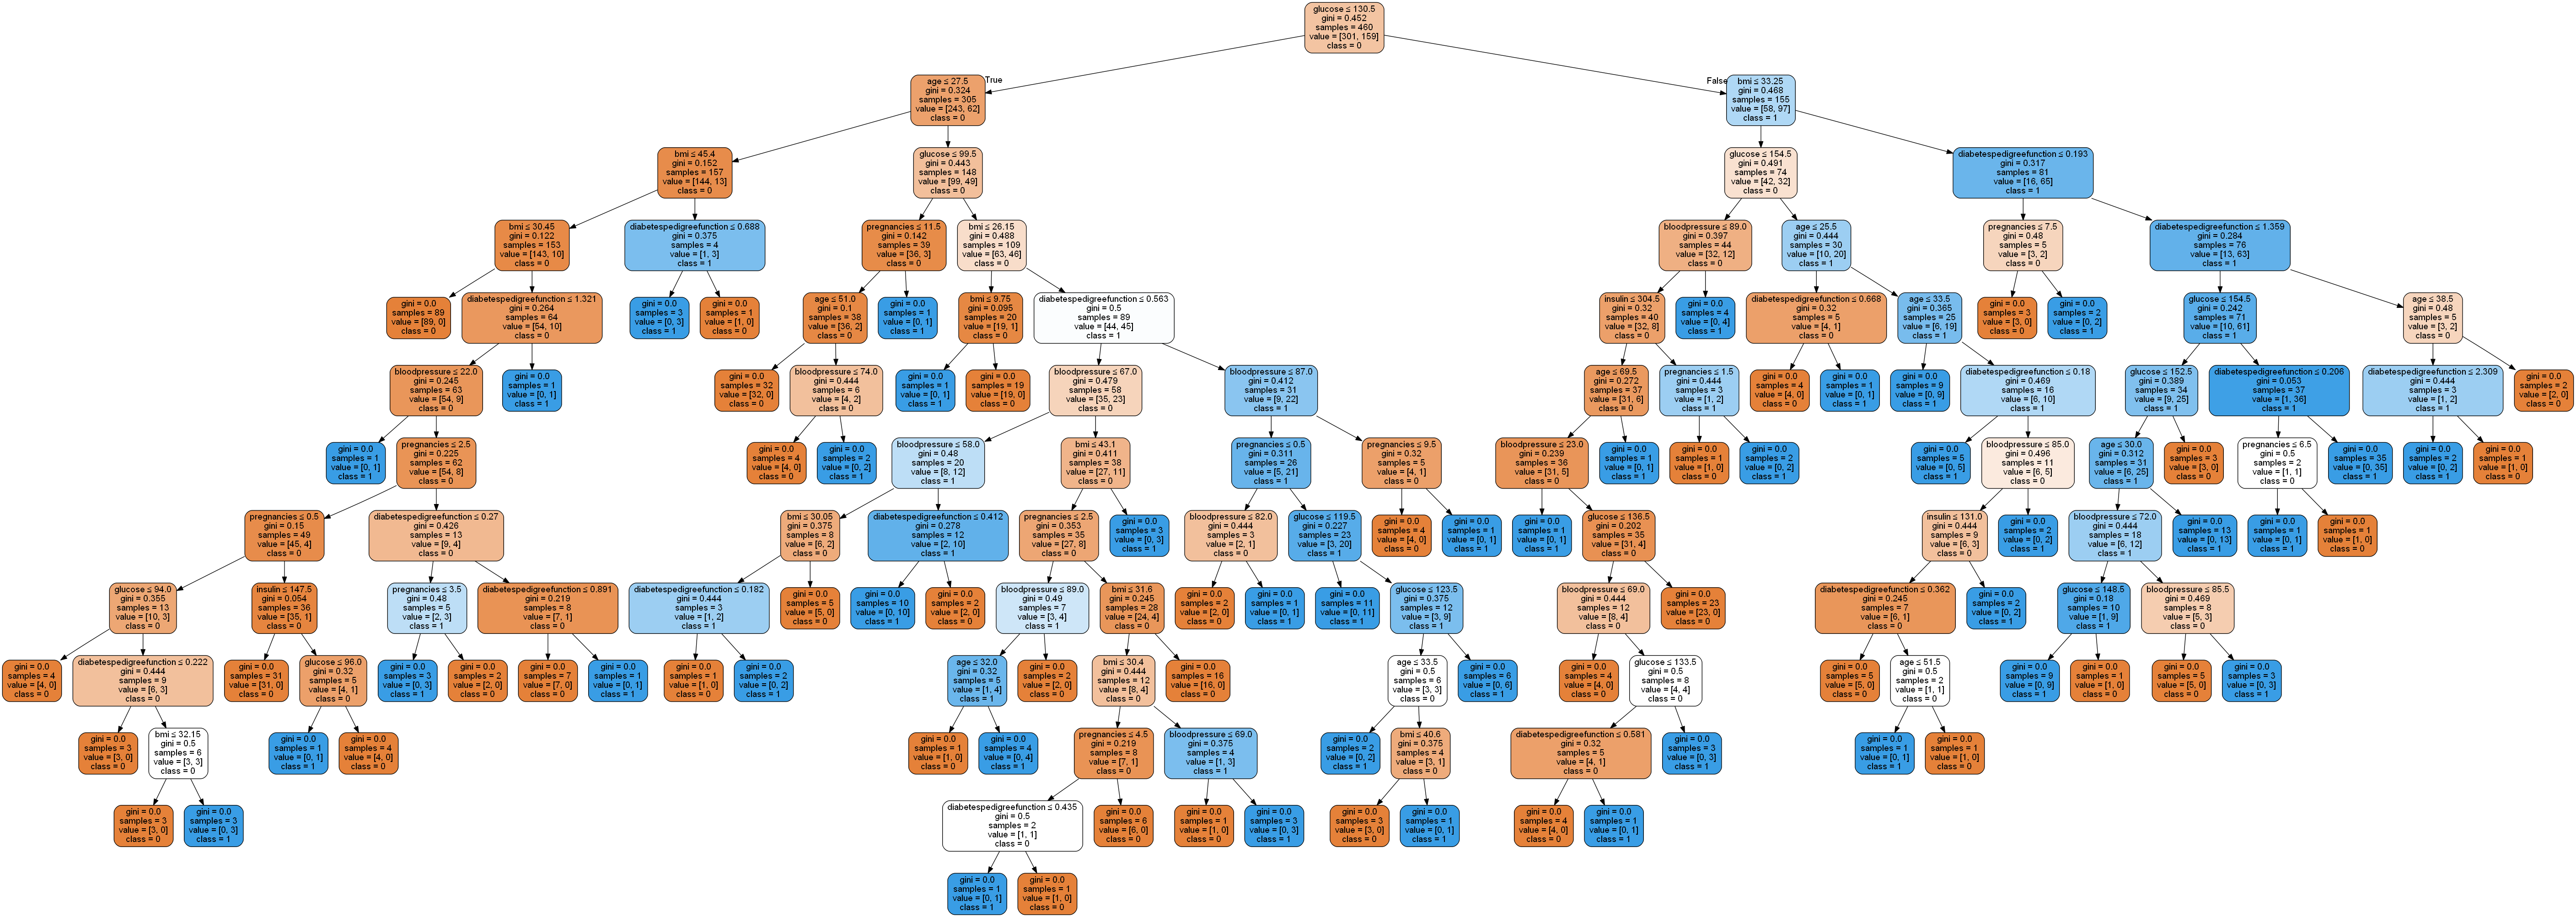

In [10]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tempo.png')
Image(graph.create_png())

In [11]:
# Cria o objeto classificador para a árvore de decisão
# Criterion é a função de medida de qualidade da separação da árvore. 
#   “gini" valor default (Gini impurity) 
#   “entropy” para information gain
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Treina o objeto classificador
clf = clf.fit(X_train,y_train)

# Realiza a predição a partir do conjunto de teste
y_pred = clf.predict(X_test)

# Apresenta a acurácia do modelo
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7337662337662337


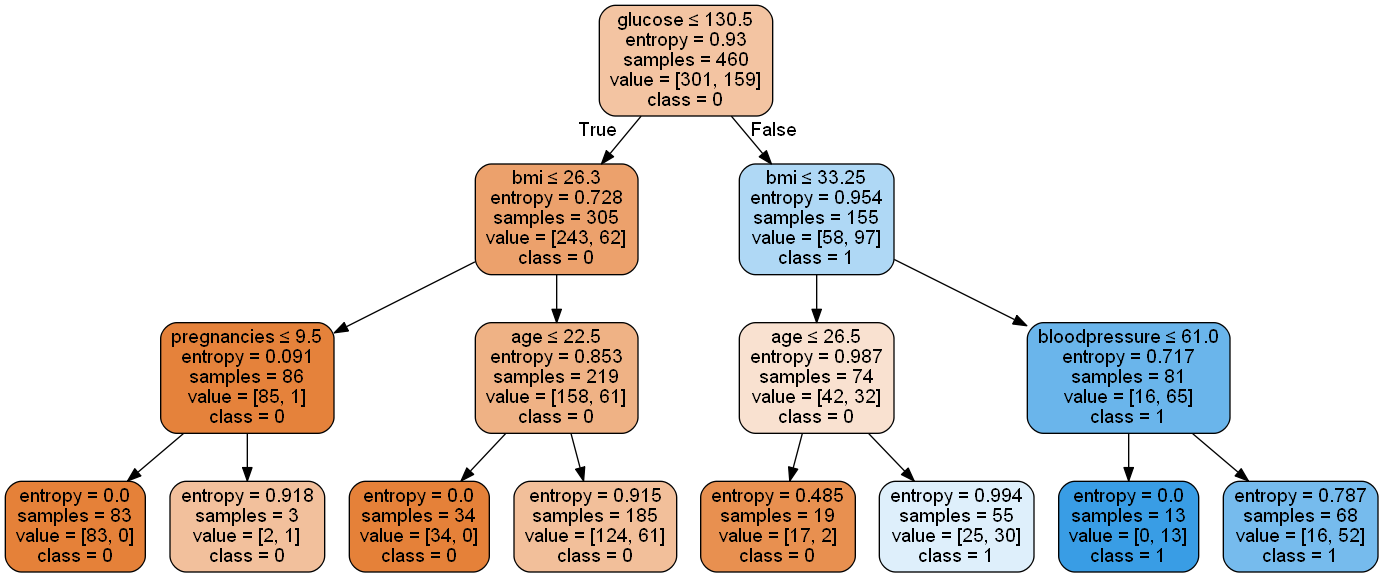

In [14]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tempo.png')
Image(graph.create_png())